# Visualisations

This notebook is dedicated to advanced, presentation-ready, and interactive visualizations. It assumes the data has already been cleaned and explored in the `EDA.ipynb` notebook. Only minimal data loading and column listing are included here for context.

Importing Libraries:

In [ ]:
# Minimal data loading for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10,6)

df = pd.read_csv('../data/StudentsPerformance.csv')

In [ ]:
# List columns for reference
print(df.columns.tolist())

### Visualise Distributions:

Numerical columns:

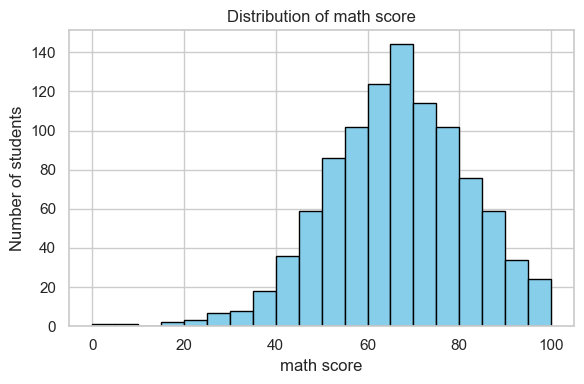

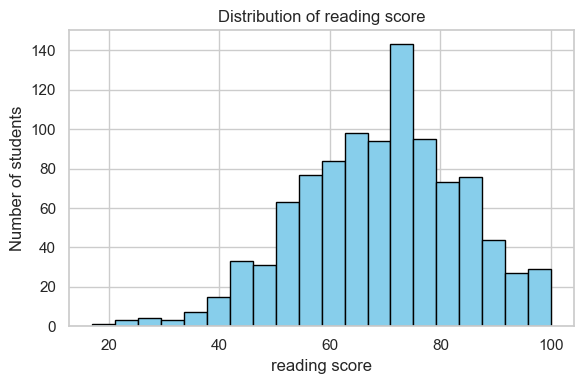

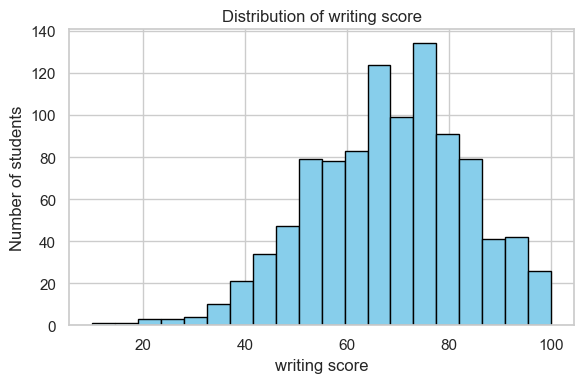

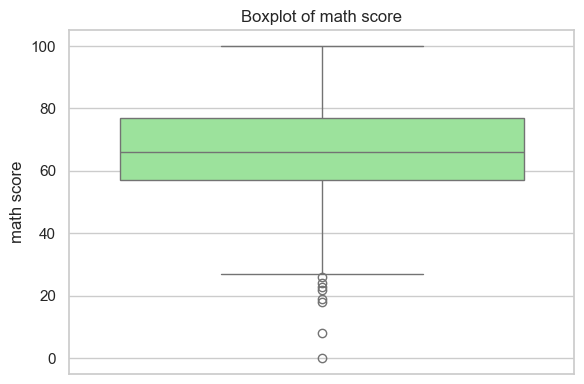

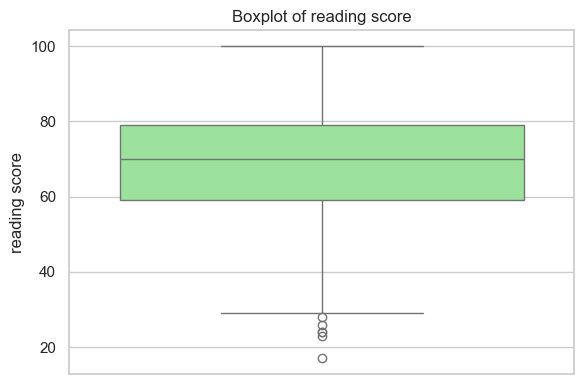

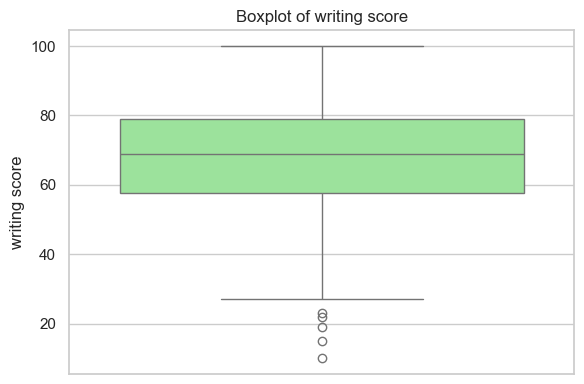

In [6]:
# Creating a histogram and box plot for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Individual histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of students')
    plt.tight_layout()
    plt.show()

# Individual box plots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Categorical columns:

C:\Users\leeno\AppData\Local\Temp\ipykernel_43428\3262910157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


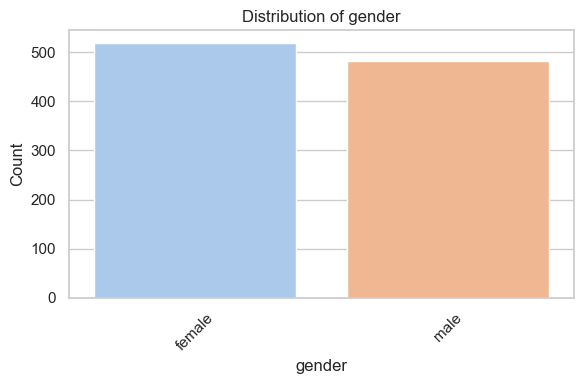

C:\Users\leeno\AppData\Local\Temp\ipykernel_43428\3262910157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


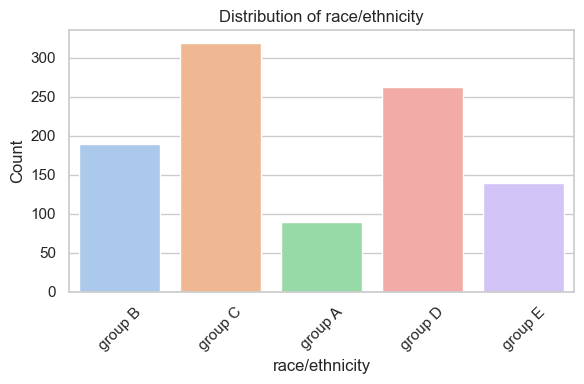

C:\Users\leeno\AppData\Local\Temp\ipykernel_43428\3262910157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


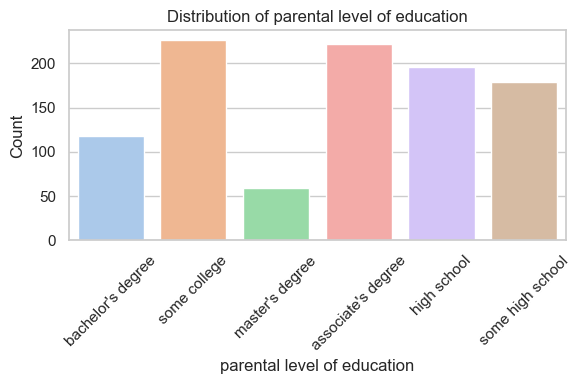

C:\Users\leeno\AppData\Local\Temp\ipykernel_43428\3262910157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


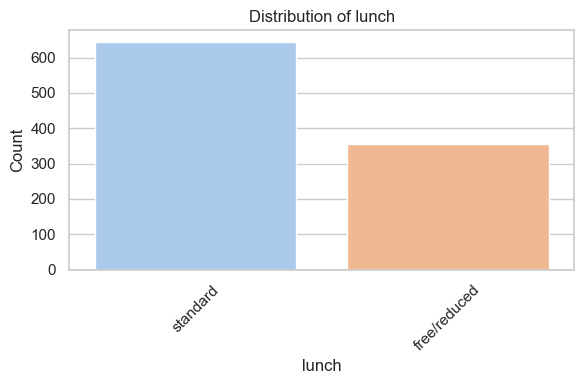

C:\Users\leeno\AppData\Local\Temp\ipykernel_43428\3262910157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


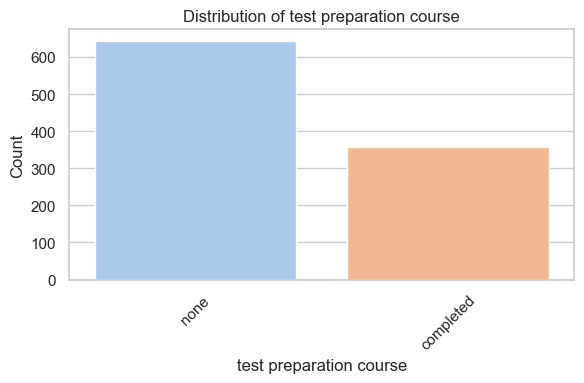

In [7]:
# Count plot
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Visualise Relationships:

Numerical vs numerical:

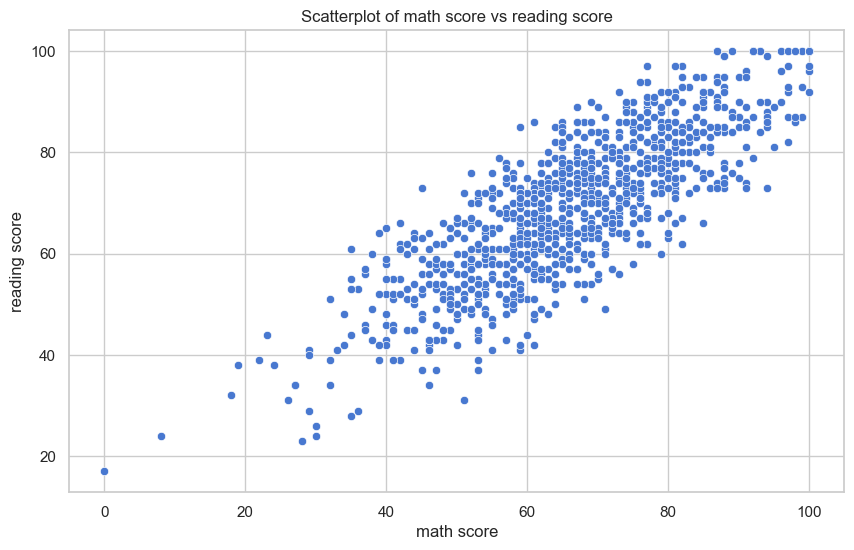

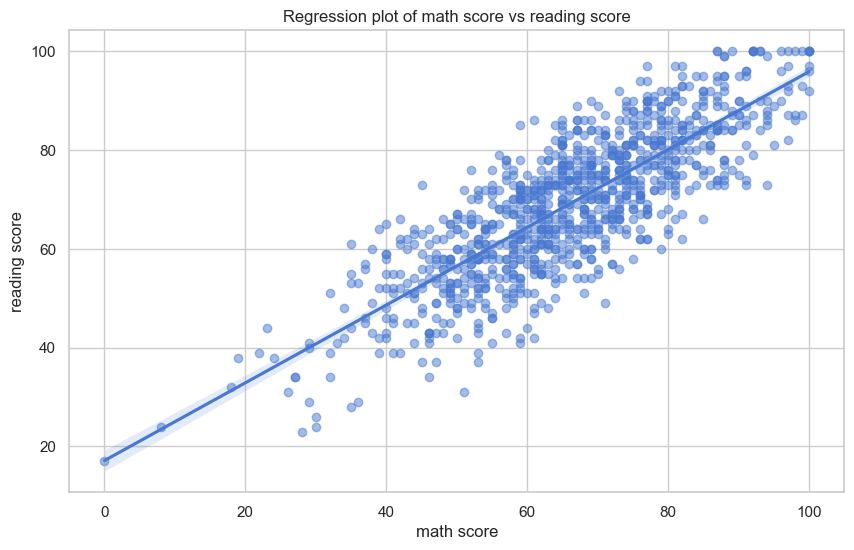

In [8]:
# Creating a scatter plot to compare two columns
if len(numeric_cols) >= 2:
    sns.scatterplot(x=numeric_cols[0], y=numeric_cols[1], data=df)
    plt.title(f'Scatterplot of {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()

# Creating a regression plot between two columns
if len(numeric_cols) >= 2:
    sns.regplot(x=numeric_cols[0], y=numeric_cols[1], data=df, scatter_kws={'alpha':0.5})
    plt.title(f'Regression plot of {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()

Categorical vs numerical:

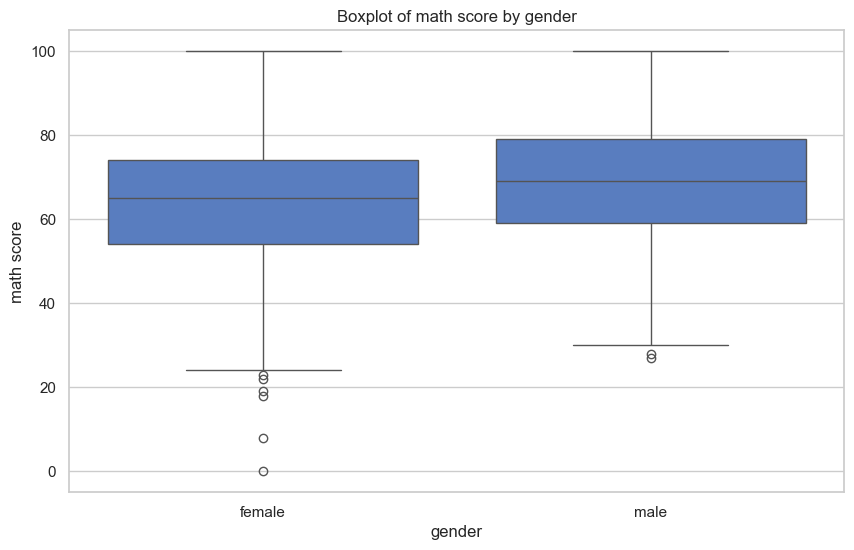

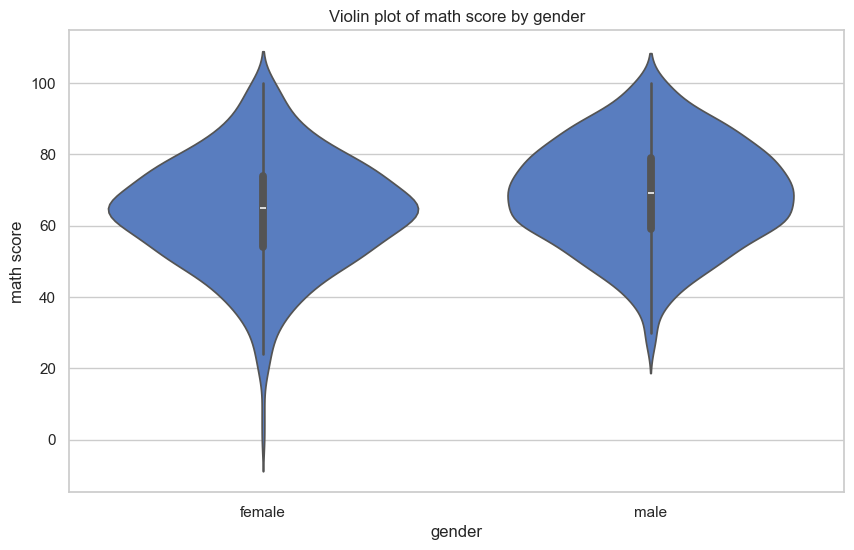

In [9]:
# Creating a box plot to compare two columns
if categorical_cols and numeric_cols:
    sns.boxplot(x=categorical_cols[0], y=numeric_cols[0], data=df)
    plt.title(f'Boxplot of {numeric_cols[0]} by {categorical_cols[0]}')
    plt.show()

# Creating a violin plot to compare two columns
if categorical_cols and numeric_cols:
    sns.violinplot(x=categorical_cols[0], y=numeric_cols[0], data=df)
    plt.title(f'Violin plot of {numeric_cols[0]} by {categorical_cols[0]}')
    plt.show()

Categorical vs categorical:

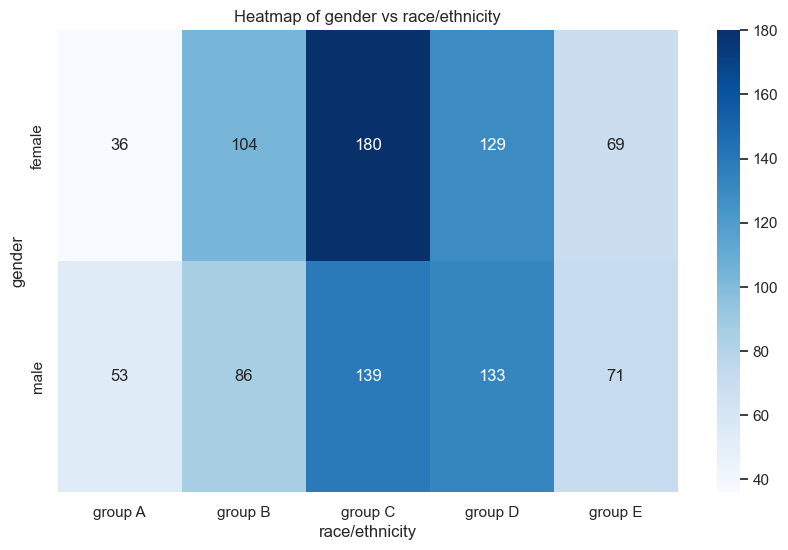

In [10]:
# Creating a cross tab to compare two categories
if len(categorical_cols) >= 2:
    cross_tab = pd.crosstab(df[categorical_cols[0]], df[categorical_cols[1]])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Heatmap of {categorical_cols[0]} vs {categorical_cols[1]}')
    plt.show()

Correlation and heatmaps:

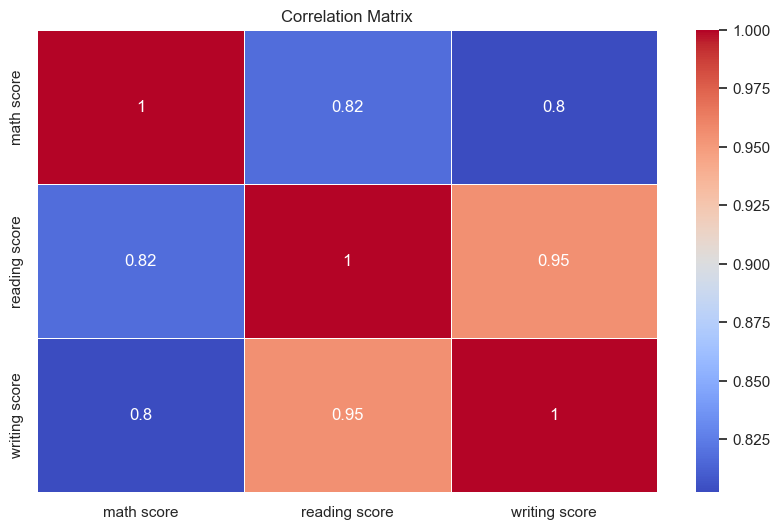

In [11]:
# Creating a correlation matrix and heatmap
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

Pair plots:

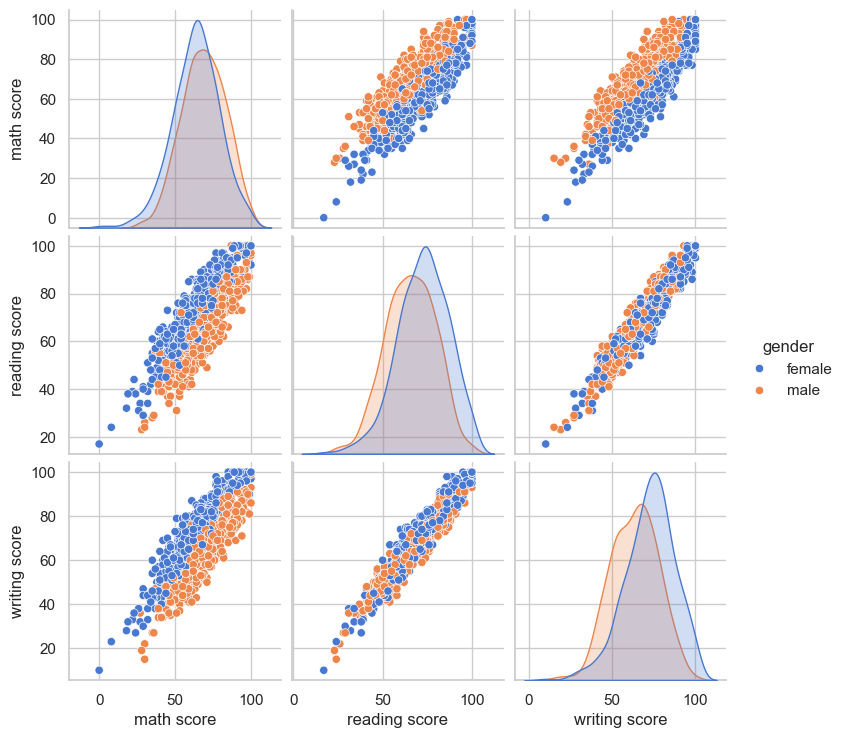

In [12]:
# Creating a pair plot
if len(numeric_cols) > 1:
    sns.pairplot(df, vars=numeric_cols, hue=categorical_cols[0] if categorical_cols else None)
    plt.show()

Time series visualisations (if applicable):

In [14]:
if 'date' in df.columns and 'value_col' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['value_col'].plot()
    plt.title('Time Series of value_col')
    plt.show()

    # Optional interactive
    px.line(df, x=df.index, y='value_col', title='Interactive Time Series')

Saving plots:

In [ ]:
# Save the last plot (run after any plot you want to save)
plt.savefig('plot_name.png', dpi=300, bbox_inches='tight') # Enter your plot name in place of 'plot_name.png' to save it